<a href="https://colab.research.google.com/github/hemanth2000/tensorflow-practice/blob/main/DeepAI-Course-I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises of Introduction to Tensorflow for AI, ML, and DL 

## Week 1

In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
model=tf.keras.Sequential(tf.keras.layers.Dense(units=1,input_shape=[1]))
model.compile(optimizer='sgd',loss='mean_squared_error')

In [ ]:
xs=np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys=np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)

In [ ]:
model.fit(xs,ys,epochs=500)

In [ ]:
model.predict([10.0])

array([[18.98004]], dtype=float32)

## Week 2

### Excercise 1 | Classification of Fashion MNIST dataset

In this section, we are going to solve a computer vision problem using Neural Networks.

Fashion MNIST dataset is used for this purpose. This dataset consists of 70k images. All images are grayscale with size of 28x28.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels) ,(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels[1]

0

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

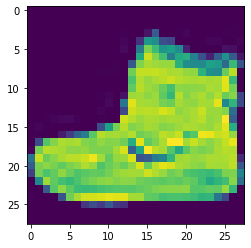

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

In [ ]:
training_images=train_images/255
testing_images=test_images/255

training_labels=train_labels
testing_labels =test_labels

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(),
                        keras.layers.Dense(128,activation=tf.nn.relu),
                        keras.layers.Dense(10,activation=tf.nn.softmax)])

In [ ]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.90:
      print('\n Reached 90% accuracy so cancelling training!')
      self.model.stop_training = True

In [ ]:
callbacks=myCallback()

model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(training_images,training_labels,epochs=500,callbacks=[callbacks])

Epoch 1/500
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3777 - accuracy: 0.8630
Epoch 2/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3348 - accuracy: 0.8769
Epoch 3/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8851
Epoch 4/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8913
Epoch 5/500
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8962
Epoch 6/500
1863/1875 [============================>.] - ETA: 0s - loss: 0.2666 - accuracy: 0.9013
 Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9013


In [ ]:
model.evaluate(testing_images,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3364 - accuracy: 0.8782


[0.3363916277885437, 0.8781999945640564]

#### Effect of number of neurons in the hidden layer

In [ ]:
model1 = keras.models.Sequential([
                                  keras.layers.Flatten(),
                                  keras.layers.Dense(1024,activation=tf.nn.relu),
                                  keras.layers.Dense(10,activation=tf.nn.softmax)
])

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(training_images,training_labels,epochs=500,callbacks=[callbacks])

Epoch 1/500
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4671 - accuracy: 0.8327
Epoch 2/500
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3577 - accuracy: 0.8681
Epoch 3/500
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3208 - accuracy: 0.8815
Epoch 4/500
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2959 - accuracy: 0.8894
Epoch 5/500
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2779 - accuracy: 0.8978
Epoch 6/500
1870/1875 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.9010
 Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2642 - accuracy: 0.9010


In [ ]:
model1.evaluate(testing_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8519


[0.41054967045783997, 0.8518999814987183]

### Excercise 2 | Classfication of MNIST dataset



In [ ]:
import tensorflow as tf

In [ ]:
def train_mnist():

  class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch , logs={}):
      if logs.get('accuracy')>0.99:
        print('\n Reached 99% accuracy...Cancelling training...')
        self.model.stop_training = True

  mnist=tf.keras.datasets.mnist
  (x_train,y_train),(x_test,y_test)=mnist.load_data()
  x_train,x_test=x_train/255.0,x_test/255.0

  callbacks = myCallback()

  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )
  
  history = model.fit(x_train,y_train,epochs=10, callbacks=[callbacks])

  return history.epoch, history.history['accuracy'][-1]


In [ ]:
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2030 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0812 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0366 - accuracy: 0.9878
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9908
 Reached 99% accuracy...Cancelling training...
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0282 - accuracy: 0.9908


([0, 1, 2, 3, 4], 0.9908499717712402)

## Week 3

### Convolution Neural Networks 

CNN are used for image classification. In this section, CNN is implemented using tensorflow for solving Fashion MNIST dataset.

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(10,activation='softmax'),
])

model.compile(
    optimizer= 'adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

In [ ]:
mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>0.99:
      print('\n Reached 99% accuracy...stopping training...')
      self.model.stop_training = True


In [ ]:
x_scaled_train=x_train/255
x_scaled_test=x_test/255

In [ ]:
callbacks=myCallback()

In [ ]:
model.fit(x_scaled_train,y_train,epochs=500,callbacks=[callbacks])

Epoch 1/500
1875/1875 [==============================] - 100s 53ms/step - loss: 0.1257 - accuracy: 0.9615
Epoch 2/500
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0410 - accuracy: 0.9868
Epoch 3/500
1875/1875 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9912
 Reached 99% accuracy...stopping training...
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0278 - accuracy: 0.9912


In [ ]:
test_loss,test_accuracy=model.evaluate(x_scaled_test,y_test)
print(test_accuracy)

313/313 [==============================] - 5s 14ms/step - loss: 0.0249 - accuracy: 0.9920
0.9919999837875366


## Week 4

### Practice

Applying Convolution Neural Networks on complex images. 

In [4]:
import tensorflow as tf

#### Downloading image data 

In [3]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 209MB/s]


In [5]:
import os
import zipfile

zip_ref=zipfile.ZipFile('./horse-or-human.zip','r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [6]:
train_horses_dir=os.path.join('./horse-or-human/horses')
train_humans_dir=os.path.join('./horse-or-human/humans')

In [7]:
train_horse_names=os.listdir(train_horses_dir)
train_human_names=os.listdir(train_humans_dir)

In [8]:
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4

pic_index=0

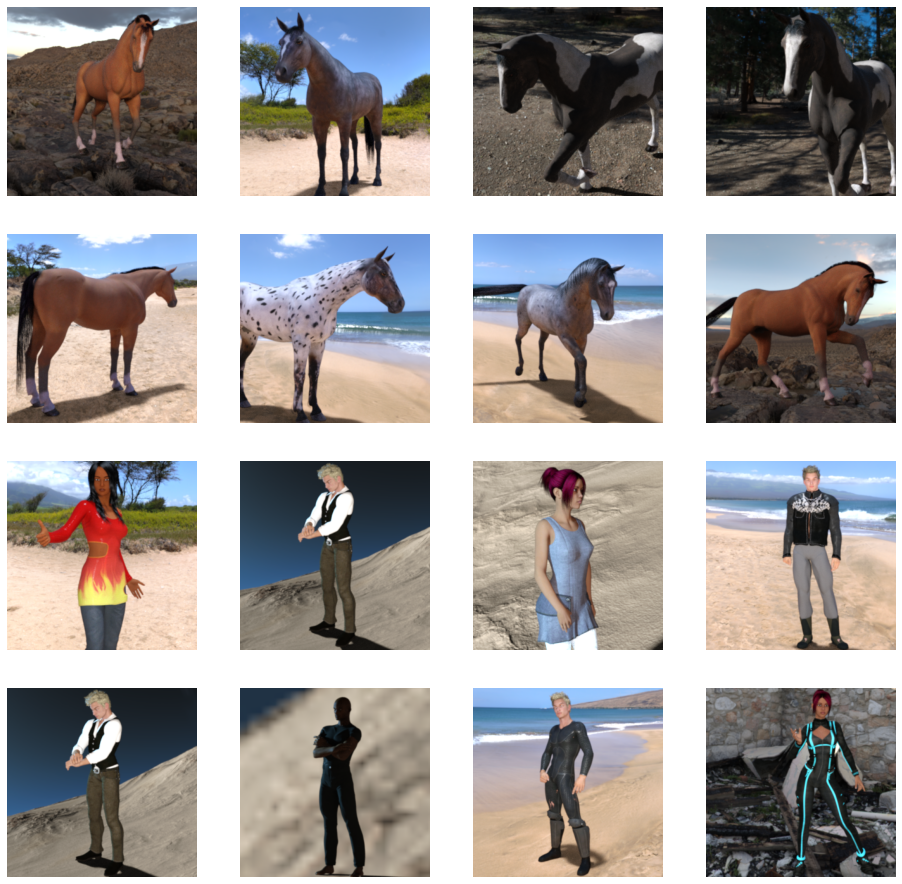

In [10]:
fig=plt.gcf()
fig.set_size_inches(4*ncols,4*nrows)

pic_index+=8

next_horse_pix=[os.path.join(train_horses_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]

next_human_pix=[os.path.join(train_humans_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):

  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  
  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#### Constructing ConvNet for the classification

In [11]:
model = tf.keras.models.Sequential([
                                    
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',
                                                           input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

#### Data preprocessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary')

Found 1027 images belonging to 2 classes.


In [15]:
history=model.fit(train_generator,
                  steps_per_epoch=8,
                  epochs=15,
                  verbose=2)

Epoch 1/15
8/8 - 19s - loss: 6.3790 - accuracy: 0.4828 - 19s/epoch - 2s/step
Epoch 2/15
8/8 - 7s - loss: 0.7419 - accuracy: 0.5551 - 7s/epoch - 902ms/step
Epoch 3/15
8/8 - 7s - loss: 0.8930 - accuracy: 0.7453 - 7s/epoch - 904ms/step
Epoch 4/15
8/8 - 7s - loss: 0.5287 - accuracy: 0.8031 - 7s/epoch - 899ms/step
Epoch 5/15
8/8 - 7s - loss: 0.1692 - accuracy: 0.9277 - 7s/epoch - 901ms/step
Epoch 6/15
8/8 - 8s - loss: 0.1288 - accuracy: 0.9414 - 8s/epoch - 981ms/step
Epoch 7/15
8/8 - 7s - loss: 0.0665 - accuracy: 0.9800 - 7s/epoch - 871ms/step
Epoch 8/15
8/8 - 7s - loss: 0.0292 - accuracy: 0.9889 - 7s/epoch - 864ms/step
Epoch 9/15
8/8 - 7s - loss: 0.0858 - accuracy: 0.9744 - 7s/epoch - 871ms/step
Epoch 10/15
8/8 - 7s - loss: 0.0185 - accuracy: 0.9956 - 7s/epoch - 915ms/step
Epoch 11/15
8/8 - 7s - loss: 0.0072 - accuracy: 1.0000 - 7s/epoch - 881ms/step
Epoch 12/15
8/8 - 7s - loss: 1.1547 - accuracy: 0.8676 - 7s/epoch - 901ms/step
Epoch 13/15
8/8 - 7s - loss: 0.0821 - accuracy: 0.9700 - 7s/ep

#### Running the model


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded= files.upload()

for fn in uploaded.keys():

  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  img.show()
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')

#### Visualizing the output layers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


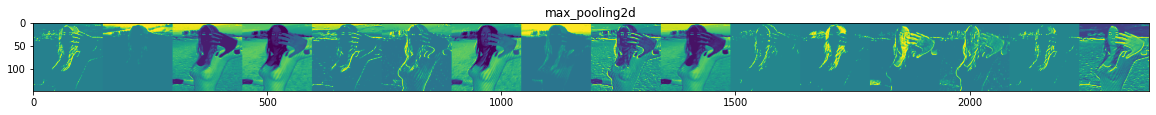

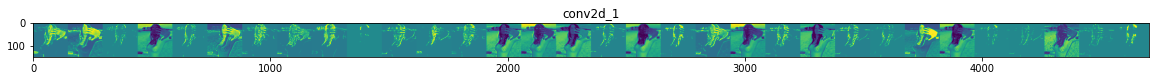

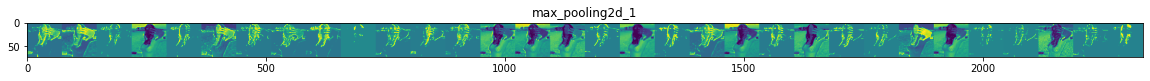

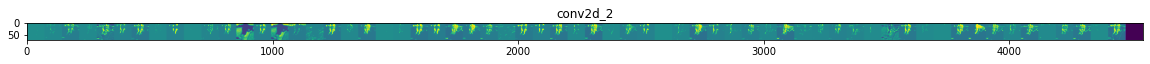

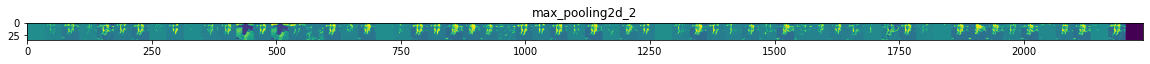

In [42]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs=model.input,outputs=successive_outputs)

horse_img_files=[os.path.join('./horse-or-human/horses',f) for f in train_horse_names]
human_img_files=[os.path.join('./horse-or-human/humans',f) for f in train_human_names]
img_path=random.choice(horse_img_files+human_img_files)

img=load_img(img_path,target_size=(300,300))
x=img_to_array(img)
x=x.reshape((1,)+x.shape)
x/=255

successive_feature_maps=visualization_model.predict(x)

layer_names=[layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names,successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    display_grid = np.zeros((size,size*n_features))

    for i in range(n_features):

      x=feature_map[0,:,:,i]
      x-=x.mean()
      x/=x.std()
      x*=64
      x+=128

      x=np.clip(x,0,255).astype('uint8')
      display_grid[:,i*size:(i+1)*size]=x

    scale=20./n_features

    plt.figure(figsize=(scale*n_features,scale))

    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')

### Complete Image Classification with Validation

#### Importing necessary libraries

In [43]:
import tensorflow as tf

#### Downloading data

In [44]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:00<00:00, 221MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 69.3MB/s]


#### Extracting the images into folders

In [45]:
import os
import zipfile

zip_ref=zipfile.ZipFile('./horse-or-human.zip','r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

zip_ref=zipfile.ZipFile('./validation-horse-or-human.zip','r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()


In [51]:
train_horse_dir= os.path.join('./horse-or-human/horses')
train_human_dir= os.path.join('./horse-or-human/humans')

val_horse_dir=os.path.join('./validation-horse-or-human/horses')
val_human_dir=os.path.join('./validation-horse-or-human/humans')

In [52]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)
val_horse_names=os.listdir(val_horse_dir)
val_human_names=os.listdir(val_human_dir)

In [53]:
print('Total training horse images: ',len(train_horse_names))
print('Total training human images: ',len(train_human_names))
print('Total validation horse images: ',len(val_horse_names))
print('Total validation human images: ',len(val_human_names))


Total training horse images:  500
Total training human images:  527
Total validation horse images:  128
Total validation human images:  128


#### Checking the images

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

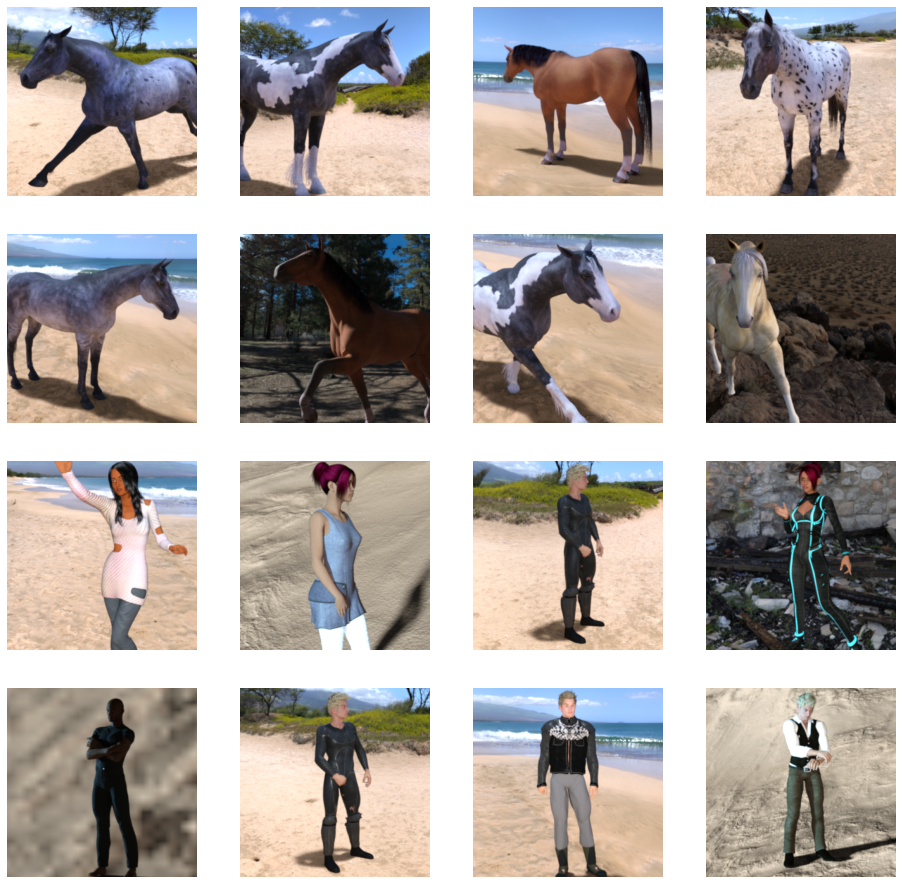

In [57]:
fig = plt.gcf()
fig.set_size_inches(4*nrows,ncols*4)

pic_index+=8

next_horse_pix=[ os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix=[os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, fname in enumerate(next_horse_pix+next_human_pix):

  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')

  img=mpimg.imread(fname)
  plt.imshow(img)

plt.show()

#### Building Sequential ConvNet 

In [58]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')                                                               
])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 64)      

#### Setting loss function and Optimizer

In [60]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy'])

#### Data preprocessing

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory('./horse-or-human',
                                  target_size=(300,300),                                  
                                  batch_size=128,
                                  class_mode='binary')

val_generator=val_datagen.flow_from_directory('./validation-horse-or-human',
                                  target_size=(300,300),                                  
                                  batch_size=32,
                                  class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


#### Training the Model

In [63]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=8,
                    epochs=15,
                    verbose=1,
                    validation_data=val_generator,
                    validation_steps=8
                    )

Epoch 1/15
8/8 [==============================] - 11s 1s/step - loss: 0.7284 - accuracy: 0.4783 - val_loss: 0.6713 - val_accuracy: 0.8398
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 1.2283 - accuracy: 0.6196 - val_loss: 0.6541 - val_accuracy: 0.5664
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.5648 - accuracy: 0.7464 - val_loss: 0.9131 - val_accuracy: 0.5508
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.5104 - accuracy: 0.8209 - val_loss: 0.4540 - val_accuracy: 0.8203
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.2219 - accuracy: 0.9288 - val_loss: 3.1926 - val_accuracy: 0.7109
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.7379 - accuracy: 0.7731 - val_loss: 0.7243 - val_accuracy: 0.8047
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.1576 - accuracy: 0.9321 - val_loss: 1.2332 - val_accuracy: 0.8086
Epoch 8/15
8/8 [========================

#### Running the model 

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded =files.upload()


for fn in uploaded.keys():

  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)

  if classes[0]>0.5:
    print(fn+' is a human')
  else:
    print(fn+" is a horse")

#### Visualizing the intermediate layer outputs 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


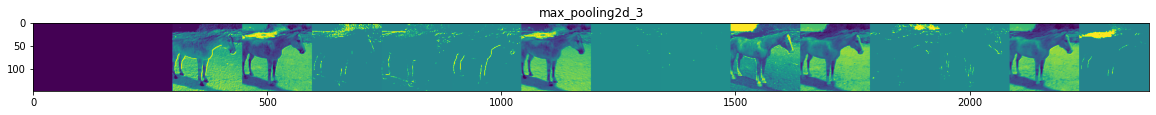

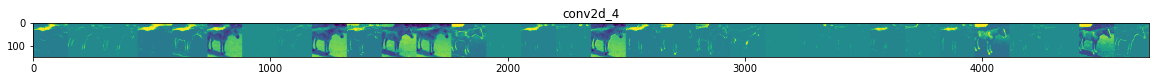

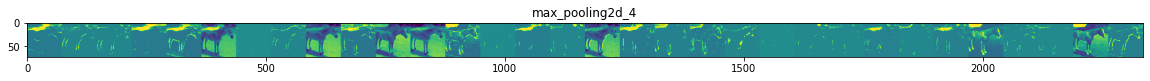

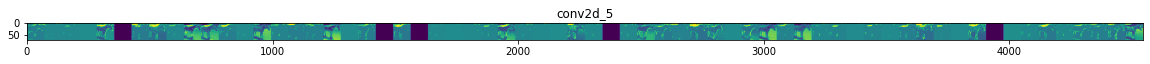

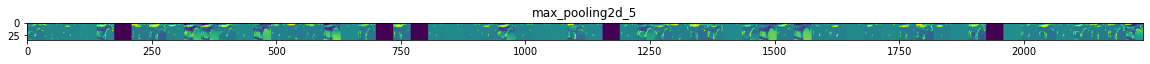

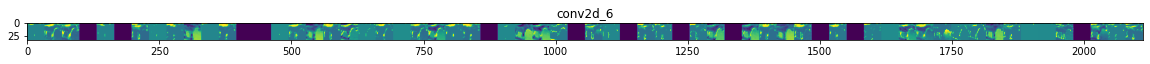

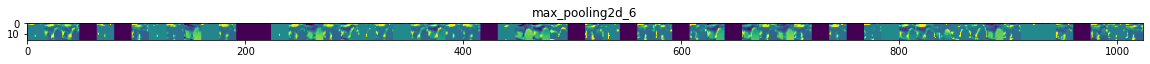

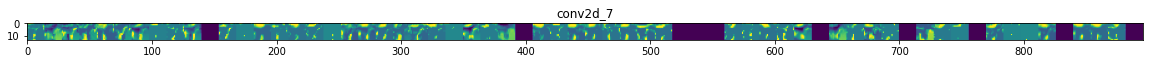

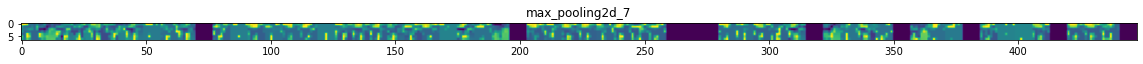

In [67]:
import numpy as np
import random
from keras.preprocessing.image import img_to_array, load_img

successive_outputs=[layer.output for layer in model.layers[1:]]
visualization_model=tf.keras.models.Model(inputs=model.input,outputs=successive_outputs)

horse_img_files=[os.path.join(train_horse_dir,f) for f in train_horse_names]
human_img_files=[os.path.join(train_human_dir,f) for f in train_human_names]

img_path=random.choice(horse_img_files+human_img_files)
img=load_img(img_path,target_size=(300,300))
x=img_to_array(img)
x=x.reshape((1,)+x.shape)

x/=255

successive_feature_maps=visualization_model.predict(x)
layer_names=[layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names,successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features=feature_map.shape[-1]
    size=feature_map.shape[1]
    display_grid=np.zeros((size,size*n_features))

    for i in range(n_features):
      x=feature_map[0,:,:,i]
      x-=x.mean()
      x/=x.std()

      x*=64
      x+=128
      x=np.clip(x,0,255).astype('uint8')

      display_grid[:,i*size:(i+1)*size]=x
    
    scale=20./n_features
    plt.figure(figsize=(scale*n_features,scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')



#### End of the problem

### Assignment | Classifying Happy or Sad 

In [1]:
!gdown --id 1NvV6VhmrfU8JDZNoEbwJxwx_6dhyN5bf 


Downloading...
From: https://drive.google.com/uc?id=1NvV6VhmrfU8JDZNoEbwJxwx_6dhyN5bf
To: /content/happy-or-sad.zip
100% 2.67M/2.67M [00:00<00:00, 83.4MB/s]


In [2]:
import tensorflow as tf
import os
import zipfile

zip_ref=zipfile.ZipFile('/content/happy-or-sad.zip','r')
zip_ref.extractall('./happy-or-sad')
zip_ref.close()

In [3]:
# defining path for directories
train_happy_dir=os.path.join('./happy-or-sad/happy')
train_sad_dir=os.path.join('./happy-or-sad/sad')

In [4]:
#get all file names
train_happy_names=os.listdir(train_happy_dir)
train_sad_names=os.listdir(train_sad_dir)

In [5]:
print("total number of training happy images: ",len(train_happy_names))
print("total number of training sad images: ",len(train_sad_names))


total number of training happy images:  40
total number of training sad images:  40


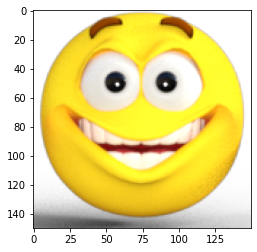

In [9]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# cool=mpimg.imread(os.path.join('happy-or-sad/happy',train_happy_names[14]))
# plt.imshow(cool)

In [15]:
def train_happy_sad_model():

  DESIRED_ACCURACY=0.999

  class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self,epoch,logs={}):

      if logs.get('accuracy')>DESIRED_ACCURACY:
        print(f'\n Reached {DESIRED_ACCURACY} accuracy so cancelling training!')
        self.model.stop_training = True

  callbacks=myCallback()

  model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                tf.keras.layers.MaxPooling2D(2,2),                      
                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),                      
                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),                      
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512,activation='relu'),
                tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  
  from tensorflow.keras.optimizers import RMSprop
  
  model.compile(
      loss='binary_crossentropy',
      optimizer=RMSprop(learning_rate=0.001),
      metrics=['accuracy'])

  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  train_datagen=ImageDataGenerator(rescale=1/255)

  train_generator=train_datagen.flow_from_directory(
      './happy-or-sad',
      target_size=(150,150),
      batch_size=10,
      class_mode='binary'
  )

  history = model.fit(
                      train_generator,
                      steps_per_epoch=8,
                      epochs=15,
                      verbose=1,
                      callbacks=[callbacks]
                      )

  return history.history['accuracy'][-1]

In [16]:
train_happy_sad_model()

Found 80 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 1s 29ms/step - loss: 3.0087 - accuracy: 0.7000
Epoch 2/15
8/8 [==============================] - 0s 28ms/step - loss: 0.4440 - accuracy: 0.8000
Epoch 3/15
8/8 [==============================] - 0s 30ms/step - loss: 0.3237 - accuracy: 0.8625
Epoch 4/15
8/8 [==============================] - 0s 29ms/step - loss: 0.1660 - accuracy: 0.9000
Epoch 5/15
8/8 [==============================] - 0s 32ms/step - loss: 0.1550 - accuracy: 0.9500
Epoch 6/15
8/8 [==============================] - 0s 29ms/step - loss: 0.1090 - accuracy: 0.9375
Epoch 7/15
8/8 [==============================] - 0s 32ms/step - loss: 0.1166 - accuracy: 0.9500
Epoch 8/15
7/8 [=========================>....] - ETA: 0s - loss: 0.0231 - accuracy: 1.0000
 Reached 0.999 accuracy so cancelling training!
8/8 [==============================] - 0s 29ms/step - loss: 0.0209 - accuracy: 1.0000


1.0